In [1]:
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

import h5py as h5

In [2]:
NIKHIL_PATH = '/home/nikhilgaruda/Simulations/Rozo/out'

with h5.File(join(NIKHIL_PATH, 'infalling_fracs.h5'), 'r') as hdf:
    ids = hdf['HID'][:]
    concentrations = np.exp(hdf['lnc'][:])
    M200 = hdf['M200m'][:]
    Morb = hdf['Morb'][:]
    frac = hdf['frac'][:]

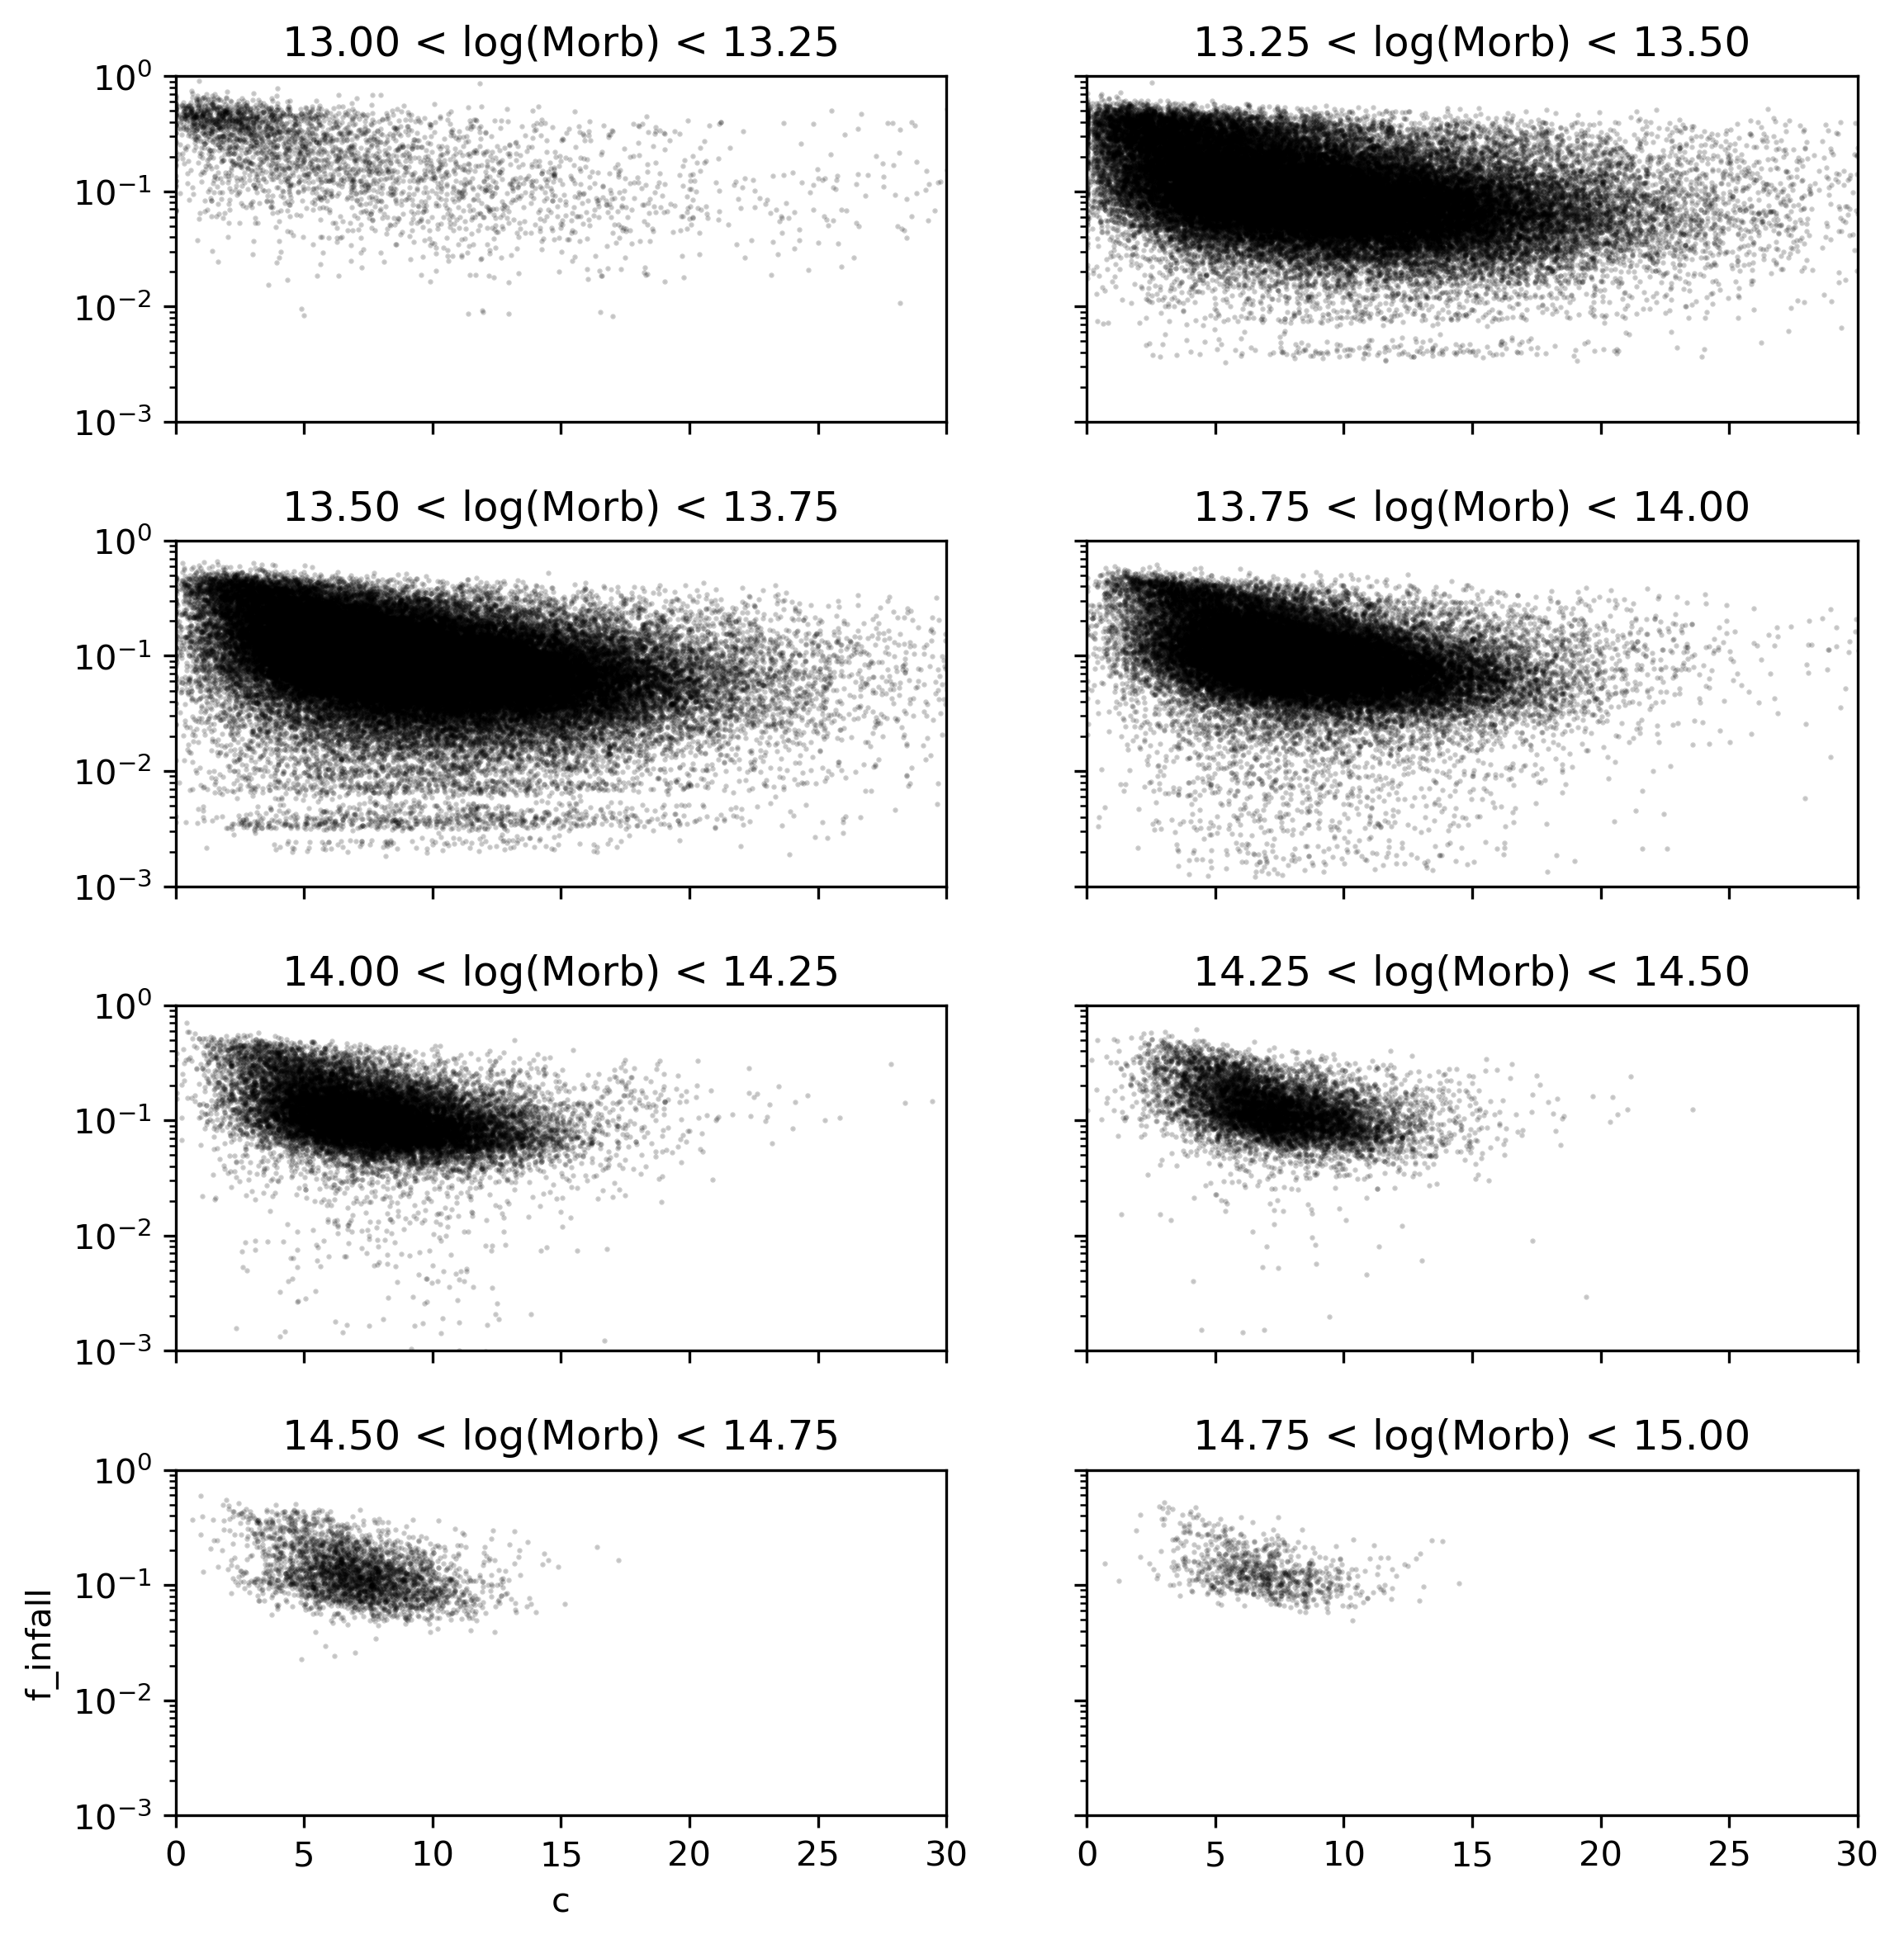

In [3]:
# scatter plot of infalling mass fraction vs concentrations separated by M200m bins

# M200m bins
MASS_BINS = np.logspace(13, 15, 9, base=10)

fig, ax = plt.subplots(4, 2, figsize=(8, 8), dpi=300, sharex=True, sharey=True)

# give padding to the subplots
fig.tight_layout(pad=2.5)

ax = ax.flatten()

for i in range(8):
    mask = (Morb > MASS_BINS[i]) & (Morb < MASS_BINS[i+1])
    ax[i].scatter(concentrations[mask], frac[mask], s=0.3, alpha=0.2, c='k')
    ax[i].set_title(f'{np.log10(MASS_BINS[i]):.2f} < log(Morb) < {np.log10(MASS_BINS[i+1]):.2f}')

ax[-2].set_xlabel('c')
ax[-2].set_ylabel('f_infall')

ax[0].set_xlim(0, 30)
ax[0].set_ylim(1e-3, 1)

# make y axis log
ax[0].set_yscale('log')

Text(161.41666666666666, 0.5, 'f_infall')

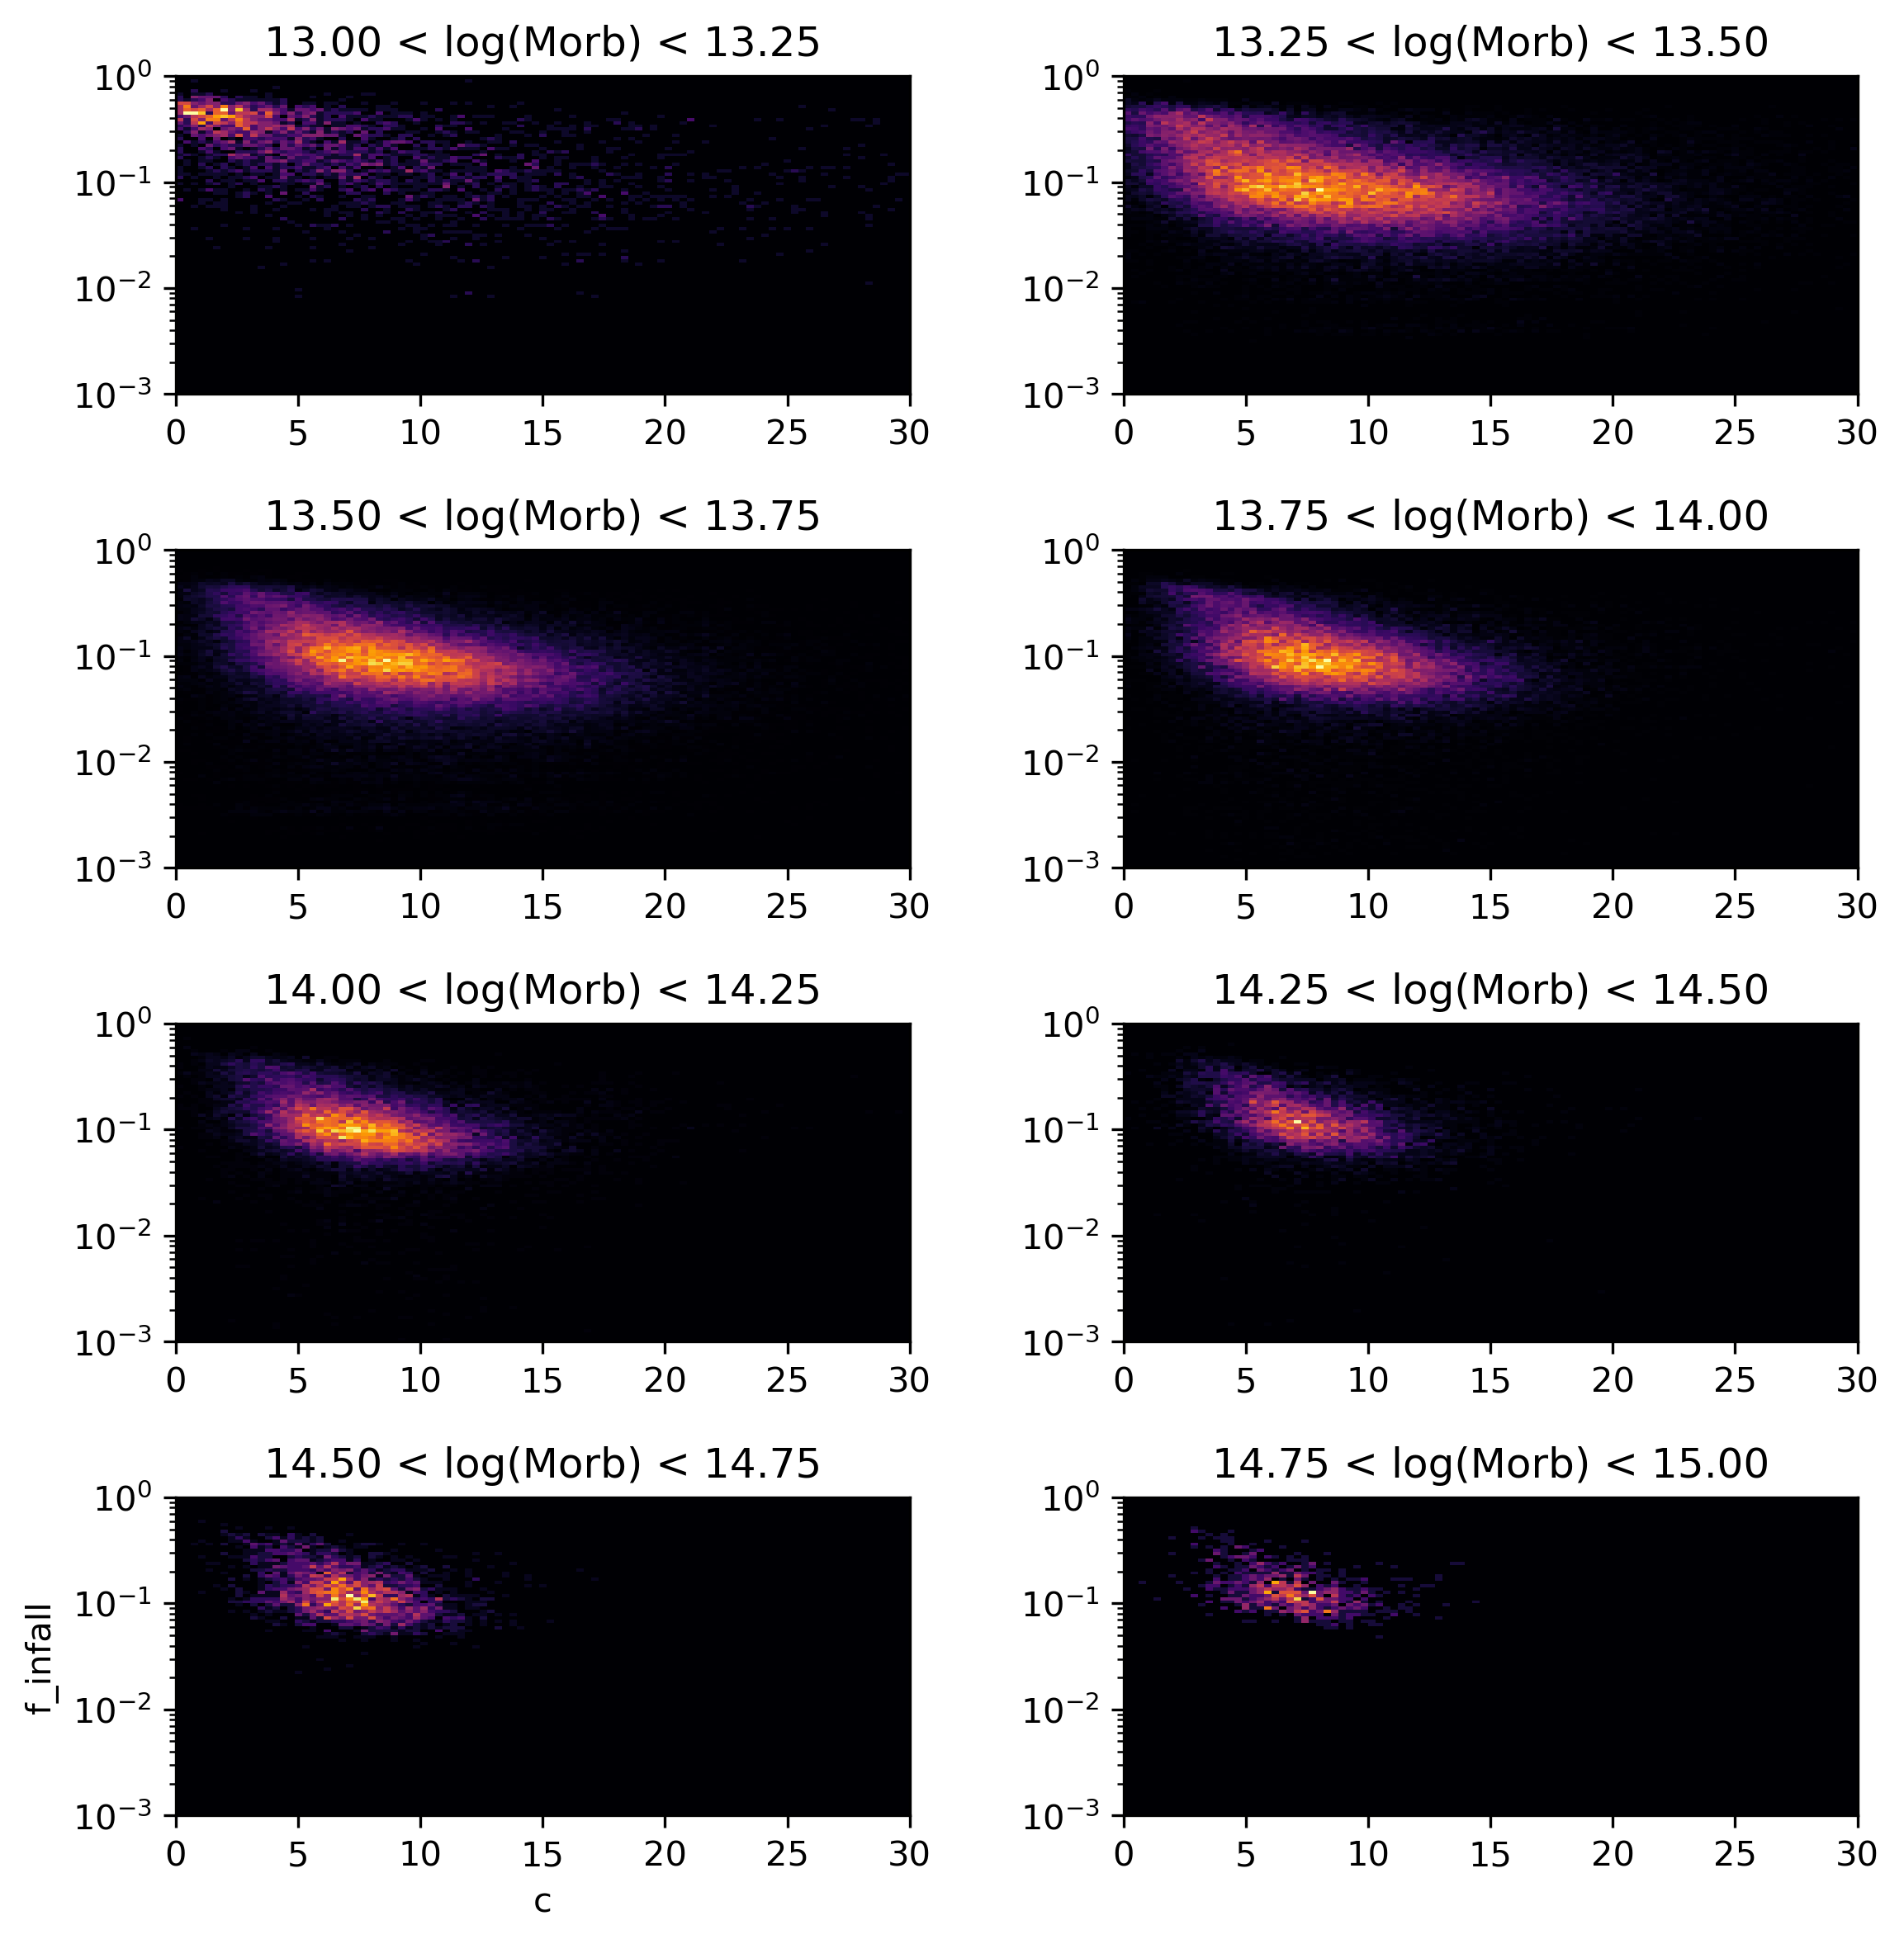

In [13]:
# make a 2d histogram of the same data
fig, ax = plt.subplots(4, 2, figsize=(8, 8), dpi=300)

# give padding to the subplots
fig.tight_layout(pad=2.5)

ax = ax.flatten()

for i in range(8):
    mask = (Morb > MASS_BINS[i]) & (Morb < MASS_BINS[i+1])
    ax[i].hist2d(concentrations[mask], frac[mask], cmap='inferno', bins=[np.linspace(0, 30, 100), np.logspace(-3, 0, 100, base=10)])
    ax[i].set_title(f'{np.log10(MASS_BINS[i]):.2f} < log(Morb) < {np.log10(MASS_BINS[i+1]):.2f}')
    ax[i].set_yscale('log')
    # ax[i].set_xlim(0, 30)
    # ax[i].set_ylim(1e-3, 1)
    
ax[-2].set_xlabel('c')
ax[-2].set_ylabel('f_infall')